In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import norm
from collections import Counter

In [2]:
dataset = pd.read_csv('D:\Sujesh\learnBay\DataSets/petrol_consumption.csv')

In [3]:
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [4]:
dataset.shape

(48, 5)

In [5]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


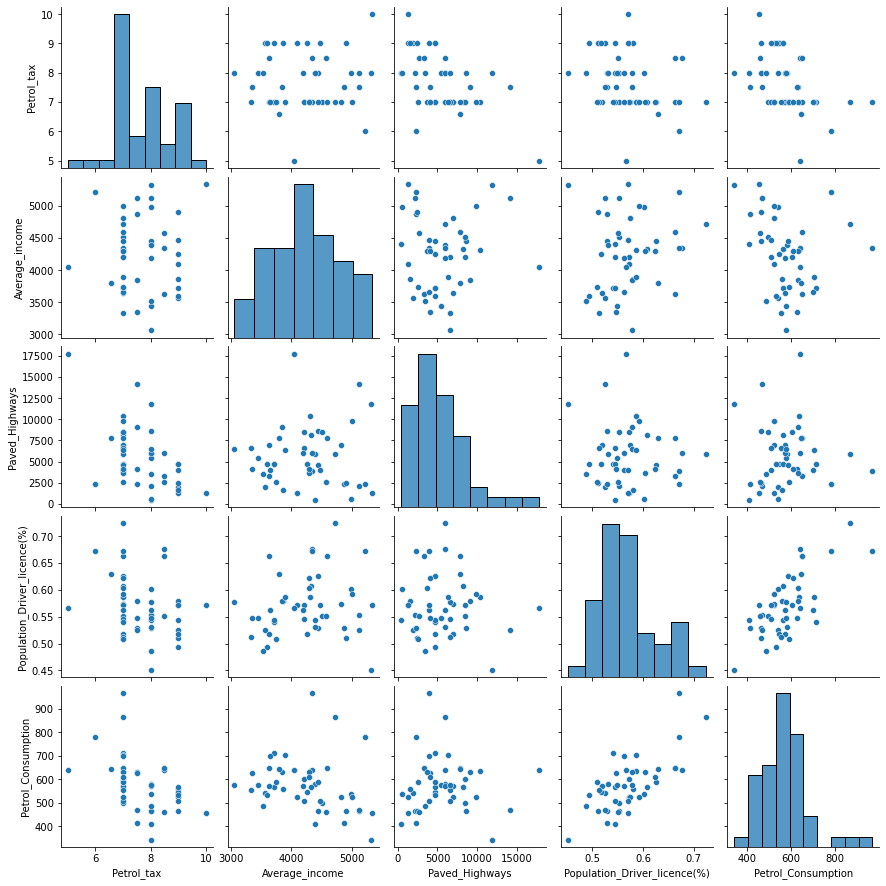

In [6]:
sns.pairplot(dataset)

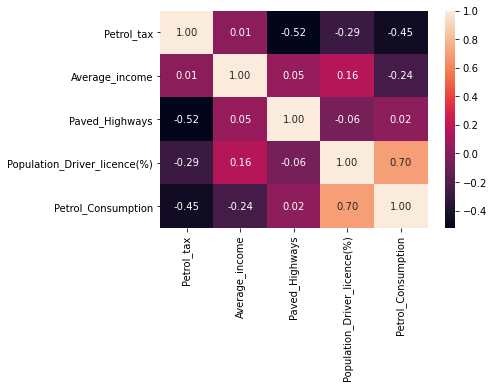

In [7]:
sns.heatmap(dataset.corr(), annot = True , fmt=".2f")
plt.show()

C:\Users\sujes\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Population_Driver_licence(%)', ylabel='Density'>

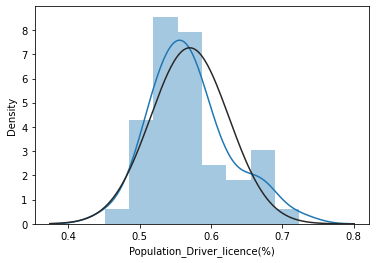

In [8]:
sns.distplot(dataset['Population_Driver_licence(%)'],fit=norm)#fit=norm

In [9]:
X = dataset[['Petrol_tax','Average_income','Population_Driver_licence(%)','Paved_Highways']]#'Petrol_tax','Paved_Highways'
y = dataset['Petrol_Consumption']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=13)

In [11]:
y_train

24    460
45    510
15    635
36    640
17    714
40    587
5     457
3     414
7     467
33    628
12    525
8     464
42    632
47    524
1     524
28    574
30    571
22    464
43    591
31    554
21    540
19    640
32    577
39    968
11    471
9     498
46    610
13    508
37    704
2     561
26    577
35    644
25    566
34    487
38    648
16    603
10    580
18    865
Name: Petrol_Consumption, dtype: int64

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train, y_train)

LinearRegression()

In [13]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-40.214615
Average_income,-0.062788
Population_Driver_licence(%),1426.621220
Paved_Highways,-0.003358


In [14]:
regressor.intercept_

353.49729129559523

In [15]:
y_pred = regressor.predict(X_train)
y_pred

array([501.75318134, 511.88861177, 602.15179804, 646.19789721,
       593.05651563, 670.13661061, 426.06105487, 492.89684077,
       491.66997703, 607.63044299, 565.1525867 , 478.44064336,
       650.05140945, 571.02464073, 546.46620998, 551.94598344,
       559.24740516, 404.87135005, 552.80863328, 572.43466715,
       575.71134779, 684.74937036, 642.13830662, 744.7560876 ,
       431.37205803, 547.6213926 , 677.33050397, 563.2567191 ,
       641.86736818, 571.00372769, 578.94422998, 721.20103277,
       518.07488253, 493.29133418, 718.29319589, 595.36363237,
       492.24238485, 788.89596594])

In [16]:
df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred})
df

,Actual,Predicted
24,460,501.753181
45,510,511.888612
15,635,602.151798
36,640,646.197897
17,714,593.056516
40,587,670.136611
5,457,426.061055
3,414,492.896841
7,467,491.669977
33,628,607.630443


Text(0, 0.5, 'Residuals')

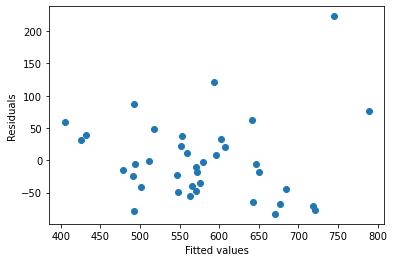

In [17]:
# Validating OLS Assumptions
plt.scatter(y_pred, (y_train-y_pred))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

In [18]:
(y_train-y_pred).mean()

-1.1817447605273245e-13

C:\Users\sujes\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Residuals')

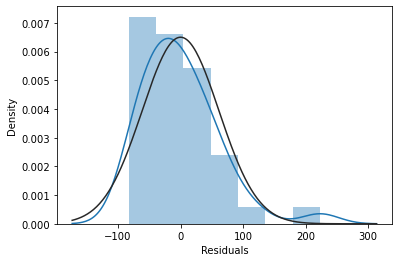

In [19]:
sns.distplot(y_train-y_pred , fit=norm);
plt.xlabel('Residuals')

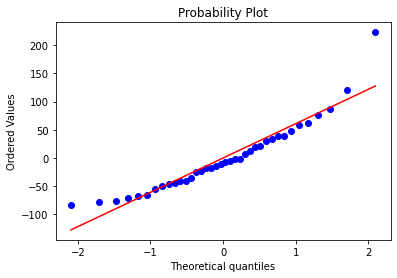

In [20]:
from scipy import stats
stats.probplot(y_train-y_pred, plot=plt)
plt.show()

In [21]:
import statsmodels.api as sm

In [22]:
# Unlike sklearn that adds an intercept to our data for the best fit, statsmodel doesn't. We need to add it ourselves
# Remember, we want to predict the price based off our features.
# X represents our predictor variables, and y our predicted variable.
# We need now to add manually the intercepts
X_endog = sm.add_constant(X_train)
X_endog1 = sm.add_constant(X_test)

In [23]:
res = sm.OLS(y_train, X_endog)
res.fit()

In [24]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Petrol_Consumption   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     16.94
Date:                Wed, 20 Oct 2021   Prob (F-statistic):           1.22e-07
Time:                        08:56:54   Log-Likelihood:                -210.36
No. Observations:                  38   AIC:                             430.7
Df Residuals:                      33   BIC:                             438.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          353.4973    196.097      1.803      0.081     -45.465     752.460
Petrol_tax                     -40.2146     15.405     -2.611      0.013     -71.556      -8.873
Average_income                  -0.0628      0.020     -3.172      0.003      -0.103      -0.023
Population_Driver_licence(%)  1426.6212    216.537      6.588      0.000     986.074    1867.169
Paved_Highways                  -0.0034      0.004     -0.828      0.414      -0.012       0.005
==============================================================================
Omnibus:                       17.059   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.210
Skew:                           1.321   Prob(JB):                     1.50e-05
Kurtosis:                       5.654   Cond. No.                     1.91e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
# Model evaluation metrics - Regression problems

y_pred1 = regressor.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))


Mean Absolute Error: 64.21137215976034
Mean Squared Error: 4960.283075036839
Root Mean Squared Error: 70.42927711567711


In [26]:
# Model evaluation metrics - Regression problems

y_pred = regressor.predict(X_train)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Mean Absolute Error: 46.35023352889988
Mean Squared Error: 3766.3675675584586
Root Mean Squared Error: 61.37073869164733


In [27]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [28]:
print('Mean Absolute percentage error:', mean_absolute_percentage_error(y_test, y_pred1))


Mean Absolute percentage error: 12.194036441841423


In [29]:
print('Mean Absolute percentage error:', mean_absolute_percentage_error(y_train, y_pred))


Mean Absolute percentage error: 7.7194871947663


In [30]:
# Build a model keeping in mind the individual t tests

In [31]:
# Model evaluation metrics - Regression problems

y_pred = regressor.predict(X_train)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))


Mean Absolute Error: 46.35023352889988
Mean Squared Error: 3766.3675675584586
Root Mean Squared Error: 61.37073869164733


In [32]:
# Model evaluation metrics - Regression problems

y_pred = res.fit().predict(X_endog)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Mean Absolute Error: 46.35023352887686
Mean Squared Error: 3766.3675675584586
Root Mean Squared Error: 61.37073869164733
